# Gender bias in Bioinformatics

This notebook shows a series of analyses conducted to study gender bians in bioinformatics. By talking the case of studies of the five most important journals in the area (nucleids acid research, bmc genomics, bmc bioinformatics, oxford bioinformatics, plos computational biology) we analyze bias in the autorship of the papers.

In [1]:
%matplotlib inline

# Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

os.chdir('..')

from db_manager import DBManager

plt.style.use('seaborn')

In [2]:
# Save current dir in case it can be useful
project_dir = os.getcwd()

# Papers

In [279]:
# Get data
papers = pd.read_csv(project_dir + '/data/papers.csv')

In [280]:
print("Total papers: " + str(papers.shape[0]))

Total papers: 38351


## Data structure

In [127]:
papers.head()

,id,title,DOI,year,source,citations,edamCategory,link,authors
0,1,A peptide-based method for 13C Metabolic Flux ...,10.1371/journal.pcbi.1003827,2014,plos computational biology,7,Omics > Genomics > Transcriptomics,https://journals.plos.org/ploscompbiol/article...,8.0
1,2,Baseline CD4+ T cell counts correlates with HI...,10.1371/journal.pcbi.1003830,2014,plos computational biology,0,Computational Biology > Phylogeny,https://journals.plos.org/ploscompbiol/article...,10.0
2,3,Evolution of the F0F1 ATP Synthase Complex in ...,10.1371/journal.pcbi.1003821,2014,plos computational biology,8,Computational Biology > Structure analysis,https://journals.plos.org/ploscompbiol/article...,2.0
3,4,Dynamic Modelling of Pathways to Cellular Sene...,10.1371/journal.pcbi.1003728,2014,plos computational biology,12,Computational Biology > Phylogeny,https://journals.plos.org/ploscompbiol/article...,7.0
4,5,Unbiased Functional Clustering of Gene Variant...,10.1371/journal.pcbi.1003815,2014,plos computational biology,7,Omics > Genomics > Functional genomics,https://journals.plos.org/ploscompbiol/article...,3.0


### Papers without authors

In [282]:
papers_without_authors = papers[papers['authors']==0]
print("Papers without authors " + str(papers_without_authors.shape[0]))
papers_without_authors.head()

Papers without authors 16


,id,title,DOI,year,source,citations,edamCategory,link,authors
2285,2286,The gene ontology's reference genome project: ...,10.1371/journal.pcbi.1000431,2009,plos computational biology,59,Computational Biology > Molecular genetics,https://journals.plos.org/ploscompbiol/article...,0.0
19923,19924,The Universal Protein resource (UniProt),10.1093/nar/gkm895,2008,nucleic acids research,601,Computational Biology > Molecular interactions...,https://academic.oup.com/nar/article/36/suppl_...,0.0
22017,22018,Reorganizing the protein space at the Universa...,10.1093/nar/gkr981,2012,nucleic acids research,925,Computational Biology > Structure analysis,https://academic.oup.com/nar/article/40/D1/D71...,0.0
23117,23118,The Universal Protein Resource (UniProt),10.1093/nar/gkl929,2007,nucleic acids research,364,Computational Biology > Phylogeny,https://academic.oup.com/nar/article/35/suppl_...,0.0
23536,23537,The universal protein resource (UniProt) in 2010,10.1093/nar/gkp846,2009,nucleic acids research,50,Computational Biology > Sequence analysis,https://academic.oup.com/nar/article/38/suppl_...,0.0


In [129]:
papers = papers[papers['authors']!=0]
print("Papers with authors " + str(papers.shape[0]))

Papers with authors 38335


## Evolution of papers by year

In [130]:
papers_by_year = papers.groupby('year').size()

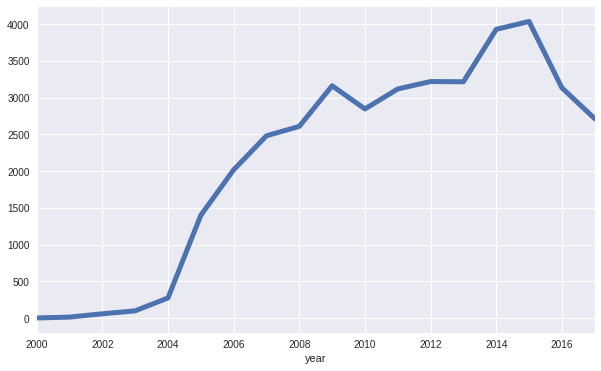

In [131]:
plt.figure(figsize=(10,6))
papers_by_year.plot(lw=5)

## Evolution of average citations over years

In [132]:
papers['citations'].describe()

count    38335.000000
mean        34.062658
std        154.072131
min          0.000000
25%          5.000000
50%         13.000000
75%         31.000000
max      14513.000000
Name: citations, dtype: float64

### Paper with max citation

In [284]:
papers[papers['citations']==max(papers['citations'])].head()

,id,title,DOI,year,source,citations,edamCategory,link,authors
35746,35747,Clustal W and Clustal X version 2.0,10.1093/bioinformatics/btm404,2007,oxford bioinformatics,14513,Computational Biology > Molecular genetics,https://academic.oup.com/bioinformatics/articl...,13.0


### Average citations by year

In [133]:
avg_citations_by_year = papers.groupby('year').mean()['citations']

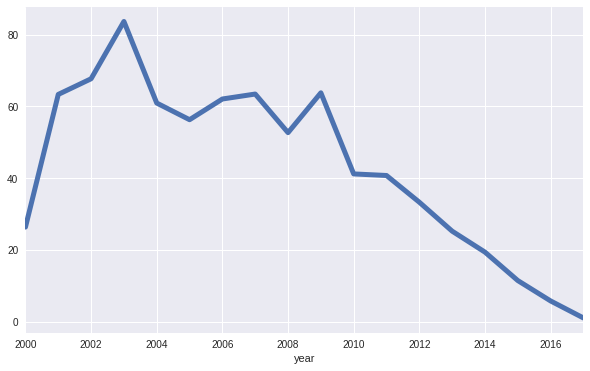

In [134]:
plt.figure(figsize=(10,6))
avg_citations_by_year.plot(lw=5)

## Evolution of average authors over years

In [135]:
papers['authors'].describe()

count    38329.000000
mean         5.562603
std          3.961211
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max        138.000000
Name: authors, dtype: float64

### Paper with max number of authors

In [283]:
papers[papers['authors']==max(papers['authors'])].head()

,id,title,DOI,year,source,citations,edamCategory,link,authors
19897,19898,"The H-Invitational Database (H-InvDB), a compr...",10.1093/nar/gkm999,2008,nucleic acids research,54,Computational Biology > Sequence analysis,https://academic.oup.com/nar/article/36/suppl_...,138.0


### Average number of authors by year

In [136]:
avg_authors_by_year = papers.groupby('year').mean()['authors']

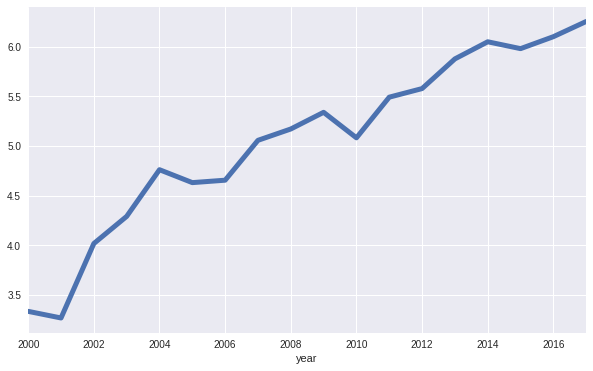

In [137]:
plt.figure(figsize=(10,6))
avg_authors_by_year.plot(lw=5)

## Categories

In [102]:
row_categories = papers['edamCategory']
categories = []
for row_category in row_categories:
    for category in row_category.split('>'):
        clean_category = category.strip()
        exists_category_dict = False
        for category_dict in categories:
            if category_dict['category_name'] == clean_category:
                category_dict['count'] += 1
                exists_category_dict = True
                break
        if not exists_category_dict:
            categories.append(
                {
                    'category_name': clean_category,
                    'count': 1
                }
            )

In [114]:
categories_df = pd.DataFrame(categories)
total_categories = categories_df.shape[0]
print("There are " + str(total_categories) + " categories")
categories_df.sort_values('count', inplace=True, ascending=False)
categories_df.head()

There are 18 categories


,category_name,count
3,Computational Biology,24273
0,Omics,12567
1,Genomics,12567
7,Nucleic acids,6663
6,Functional genomics,5293


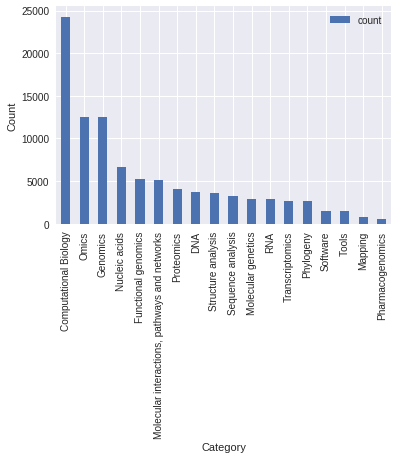

In [120]:
categories_df.plot.bar(x='category_name', y='count')
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

## Source

In [90]:
papers_by_source = papers.groupby('source').size().sort_values(ascending=False)

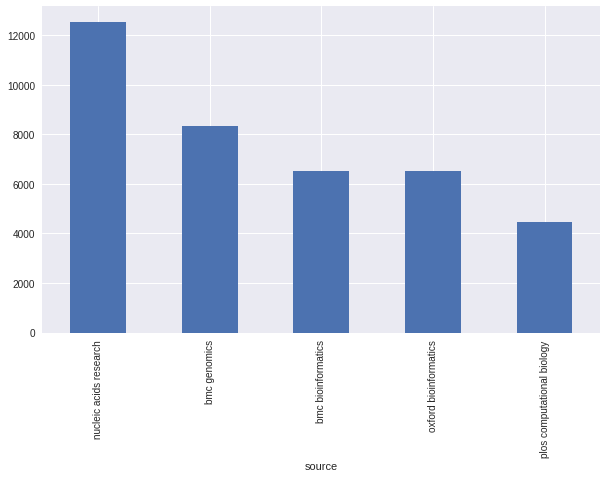

In [91]:
plt.figure(figsize=(10,6))
papers_by_source.plot(kind='bar')

# Authors

In [249]:
# Get data
authors = pd.read_csv(project_dir + '/data/authors.csv')

In [70]:
print("Total authors: " + str(authors.shape[0]))

Total authors: 122963


## Data structure

In [121]:
authors.head()

,id,name,gender,papers,total_citations,papers_as_first_author,papers_with_citations,h-index
0,1,Amit Ghosh,male,3,21,1,3,2
1,2,Jerome Nilmeier,male,1,7,0,1,1
2,3,Paul D Adams,male,3,92,0,3,3
3,4,Jay D Keasling,male,10,214,0,10,7
4,5,Aindrila Mukhopadhyay,female,6,59,0,5,4


## Gender distribution 

In [251]:
authors_by_gender = authors.groupby('gender').size().sort_values(ascending=False)
per_authors_by_gender = authors_by_gender/authors.shape[0]
per_authors_by_gender

gender
male         0.548490
female       0.287225
unknown      0.164277
error_api    0.000008
dtype: float64

In [252]:
authors_by_gender

gender
male         67444
female       35318
unknown      20200
error_api        1
dtype: int64

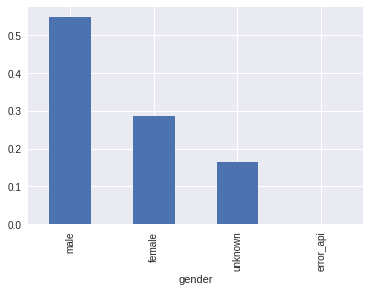

In [129]:
per_authors_by_gender.plot.bar()

## Papers

### Citations per paper

In [136]:
authors['total_citations'].describe()

count    122963.000000
mean         69.357839
std         311.810533
min           0.000000
25%           6.000000
50%          19.000000
75%          49.000000
max       24962.000000
Name: total_citations, dtype: float64

### Author with max number of citations

In [285]:
authors[authors['total_citations']==max(authors['total_citations'])]

,id,name,gender,papers,total_citations,papers_as_first_author,papers_with_citations,h-index
7414,7415,Richard Durbin,male,21,24962,1,20,16


### Top-10 Most cited authors

In [149]:
authors.sort_values('total_citations', inplace=True, ascending=False)
authors[['name','gender','total_citations']].head(10)

,name,gender,total_citations
7414,Richard Durbin,male,24962
26068,Heng Li,unknown,22523
96294,R Lopez,unknown,15715
87351,F Valentin,unknown,14613
115136,T J Gibson,unknown,14539
118421,J D Thompson,unknown,14518
118416,R Chenna,unknown,14513
118415,N P Brown,unknown,14513
118422,D G Higgins,unknown,14513
118420,A Wilm,unknown,14513


#### Top-10 most cited female authors

In [162]:
authors.sort_values('total_citations', inplace=True, ascending=False)
authors[authors['gender']=='female'][['name','gender','total_citations']].head(10)
#authors[['name','gender','total_citations']].head(10)

,name,gender,total_citations
52115,Jue Ruan,female,9984
78212,Mao Tanabe,female,5232
78211,Miho Furumichi,female,5232
22187,Fiona Cunningham,female,4685
85803,Narmada Thanki,female,4501
85793,Noreen R Gonzales,female,4446
85804,Roxanne A Yamashita,female,4446
85791,Myra K Derbyshire,female,4446
85800,Gabriele H Marchler,female,4446
73603,Donna R Maglott,female,4408


### Papers per author

In [138]:
authors['papers'].describe()

count    122963.000000
mean          1.732098
std           2.065762
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          69.000000
Name: papers, dtype: float64

### Top-10 Most productive author

In [150]:
authors.sort_values('papers', inplace=True, ascending=False)
authors[['name','gender','papers']].head(10)

,name,gender,papers
8093,Peter F Stadler,male,69
3250,Janusz M Bujnicki,male,68
1943,Wei Wang,unknown,62
3241,Peer Bork,male,53
4104,Alfonso Valencia,male,51
265,Philip E Bourne,male,48
1941,Jun Wang,male,48
23361,Wei Li,unknown,47
10014,Jing Wang,unknown,46
3420,Mark Gerstein,male,46


#### Top-10 most productive female authors

In [254]:
authors.sort_values('papers', inplace=True, ascending=False)
authors[authors['gender']=='female'][['name','gender','papers']].head(10)

,name,gender,papers
770,Olga G Troyanskaya,female,35
17453,Rita Casadio,female,34
1846,Luonan Chen,female,32
62,Jin Wang,female,30
107,Ruth Nussinov,female,29
17417,Sophia Ananiadou,female,29
2449,Shoba Ranganathan,female,28
17794,Lin Liu,female,28
122924,Charlotte M Deane,female,26
13627,Cathy H Wu,female,26


### H-Index

The **`h-index`** is computed based only on the papers available of the dataset

In [143]:
authors['h-index'].describe()

count    122963.000000
mean          1.483625
std           1.450438
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          32.000000
Name: h-index, dtype: float64

### Top-10 most impactful author

In [155]:
authors.sort_values('h-index', inplace=True, ascending=False)
authors[['name','gender','papers','total_citations','h-index']].head(10)

,name,gender,papers,total_citations,h-index
3241,Peer Bork,male,53,12624,32
8093,Peter F Stadler,male,69,3420,30
3420,Mark Gerstein,male,46,2202,25
26310,Minoru Kanehisa,male,31,10150,25
8765,Ewan Birney,male,32,7033,25
4047,David S Wishart,male,37,9711,25
265,Philip E Bourne,male,48,3171,25
122946,William Stafford Noble,male,40,4243,24
3250,Janusz M Bujnicki,male,68,2186,23
18169,Hsien-Da Huang,male,35,2813,23


#### Top-10 most impacful female authors

In [163]:
authors.sort_values('h-index', inplace=True, ascending=False)
authors[authors['gender']=='female'][['name','gender','papers','total_citations','h-index']].head(10)

,name,gender,papers,total_citations,h-index
770,Olga G Troyanskaya,female,35,1473,20
17417,Sophia Ananiadou,female,29,754,18
20365,Helen Parkinson,female,23,2892,18
1846,Luonan Chen,female,32,976,17
107,Ruth Nussinov,female,29,1656,17
13627,Cathy H Wu,female,26,3676,17
2256,Janet M Thornton,female,23,1516,16
5222,Christine A Orengo,female,25,1180,16
338,Ivet Bahar,female,24,1097,16
18946,Drena Dobbs,female,17,1008,16


### First author

In [156]:
authors['papers_as_first_author'].describe()

count    122963.000000
mean          0.310866
std           0.656986
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          14.000000
Name: papers_as_first_author, dtype: float64

### Top-10 authors that appeared as first author

In [157]:
authors.sort_values('papers_as_first_author', inplace=True, ascending=False)
authors[['name','gender','papers','papers_as_first_author']].head(10)

,name,gender,papers,papers_as_first_author
26068,Heng Li,unknown,19,14
8781,Kai Wang,male,32,13
18741,Shuangge Ma,female,17,12
18398,Yi Wang,unknown,22,12
16474,Bin Liu,unknown,21,11
10929,Robert Hoehndorf,male,16,11
1943,Wei Wang,unknown,62,11
15446,Junbai Wang,unknown,12,11
3123,Yan Zhang,male,45,10
5690,Zhiming Dai,unknown,13,10


#### Top-10 female authors that appeared as first author

In [166]:
authors.sort_values('papers_as_first_author', inplace=True, ascending=False)
authors[authors['gender']=='female'][['name','gender','papers','papers_as_first_author']].head(10)

,name,gender,papers,papers_as_first_author
18741,Shuangge Ma,female,17,12
19205,Christina Backes,female,22,9
3238,Wei-Hua Chen,female,10,8
86050,Cristina Aurrecoechea,female,9,7
80081,Agnieszka Kiliszek,female,7,7
26443,Milana Frenkel-Morgenstern,female,8,7
8064,Michelle S Scott,female,11,6
19743,Eva Freyhult,female,8,6
24546,Monica Chagoyen,female,9,6
28952,Sook Jung,female,8,6


## Papers without citations

In [169]:
authors['papers_without_citations'] = authors['papers'] - authors['papers_with_citations']
authors.head()

,id,name,gender,papers,total_citations,papers_as_first_author,papers_with_citations,h-index,papers_without_citations
26068,26069,Heng Li,unknown,19,22523,14,19,14,0
8781,8782,Kai Wang,male,32,3154,13,28,15,4
18398,18399,Yi Wang,unknown,22,323,12,21,11,1
18741,18742,Shuangge Ma,female,17,412,12,16,11,1
1943,1944,Wei Wang,unknown,62,1377,11,55,19,7


In [170]:
authors['papers_without_citations'].describe()

count    122963.000000
mean          0.120931
std           0.360789
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: papers_without_citations, dtype: float64

# Authorship

In [259]:
# Get data
papers_authors = pd.read_csv(project_dir + '/data/papers_authors.csv')

## Data structure

In [260]:
papers_authors.head()

,id,title,doi,year,category,author,author_gender,author_position
0,1,A peptide-based method for 13C Metabolic Flux ...,10.1371/journal.pcbi.1003827,2014,Omics > Genomics > Transcriptomics,Amit Ghosh,male,1
1,2,A peptide-based method for 13C Metabolic Flux ...,10.1371/journal.pcbi.1003827,2014,Omics > Genomics > Transcriptomics,Jerome Nilmeier,male,2
2,3,A peptide-based method for 13C Metabolic Flux ...,10.1371/journal.pcbi.1003827,2014,Omics > Genomics > Transcriptomics,Daniel Weaver,male,3
3,4,A peptide-based method for 13C Metabolic Flux ...,10.1371/journal.pcbi.1003827,2014,Omics > Genomics > Transcriptomics,Paul D Adams,male,4
4,5,A peptide-based method for 13C Metabolic Flux ...,10.1371/journal.pcbi.1003827,2014,Omics > Genomics > Transcriptomics,Jay D Keasling,male,5


In [261]:
papers_grouped_by_title = papers_authors.drop(['id', 'doi', 'year', 'category', 'author', 'author_position'], axis=1).groupby(['title','author_gender'], sort=False, as_index=False)
agg_papers_grouped_df = papers_grouped_by_title[['author_gender']].agg({'author_gender': {'count_gender': 'count'}})
agg_papers_grouped_df.head()

,title,author_gender,count_gender
0,A peptide-based method for 13C Metabolic Flux ...,male,6
1,A peptide-based method for 13C Metabolic Flux ...,female,2
2,Baseline CD4+ T cell counts correlates with HI...,female,2
3,Baseline CD4+ T cell counts correlates with HI...,unknown,4
4,Baseline CD4+ T cell counts correlates with HI...,male,2


In [262]:
papers_gender_dist = agg_papers_grouped_df.pivot(columns='author_gender', values='count_gender', index='title')
papers_gender_dist = papers_gender_dist.drop(['error_api', 'mostly_female', 'mostly_male'], axis=1)
papers_gender_dist = papers_gender_dist.fillna(0)
papers_gender_dist.head()

author_gender,female,male,unknown
title,,,
'Bois noir' phytoplasma induces significant reprogramming of the leaf transcriptome in the field grown grapevine,1.0,3.0,0.0
'Brukin2D': A 2D visualization and comparison tool for LC-MS data,6.0,1.0,0.0
'Double water exclusion': A hypothesis refining the O-ring theory for the hot spots at protein interfaces,0.0,0.0,1.0
"'Evidence of an auxin signal pathway, microRNA167-ARF8-GH3, and its response to exogenous auxin in cultured rice cells'",1.0,0.0,3.0
'Genome design' model and multicellular complexity: Golden middle,0.0,3.0,0.0


In [270]:
papers_gender_dist['most_female'] = np.where(papers_gender_dist['female']>papers_gender_dist['male'], 1, 0)
papers_gender_dist['most_male'] = np.where(papers_gender_dist['male']>papers_gender_dist['female'], 1, 0)
papers_gender_dist['equal_gender'] = np.where(papers_gender_dist['male']==papers_gender_dist['female'], 1, 0)
papers_gender_dist['only_male'] = np.where((papers_gender_dist['female']==0) & (papers_gender_dist['unknown']==0), 
                                           1, 0)
papers_gender_dist['only_female'] = np.where((papers_gender_dist['male']==0) & (papers_gender_dist['unknown']==0), 
                                             1, 0)
papers_gender_dist.head()

author_gender,female,male,unknown,most_female,most_male,equal_gender,only_male,only_female
title,,,,,,,,
'Bois noir' phytoplasma induces significant reprogramming of the leaf transcriptome in the field grown grapevine,1.0,3.0,0.0,0,1,0,0,0
'Brukin2D': A 2D visualization and comparison tool for LC-MS data,6.0,1.0,0.0,1,0,0,0,0
'Double water exclusion': A hypothesis refining the O-ring theory for the hot spots at protein interfaces,0.0,0.0,1.0,0,0,1,0,0
"'Evidence of an auxin signal pathway, microRNA167-ARF8-GH3, and its response to exogenous auxin in cultured rice cells'",1.0,0.0,3.0,1,0,0,0,0
'Genome design' model and multicellular complexity: Golden middle,0.0,3.0,0.0,0,1,0,1,0


## Papers with mostly male authors

In [271]:
raw_num = papers_gender_dist['most_male'].sum()
per_num = round(raw_num/papers_gender_dist.shape[0]*100,2)
print('There are {}({}%) papers which have mostly male authors'.format(raw_num, per_num))

There are 21736(56.71%) papers which have mostly male authors


## Papers with mostly female authors

In [272]:
raw_num = papers_gender_dist['most_female'].sum()
per_num = round(raw_num/papers_gender_dist.shape[0]*100,2)
print('There are {}({}%) papers which have mostly female authors'.format(raw_num, per_num))

There are 10553(27.53%) papers which have mostly female authors


## Papers with only male authors

In [273]:
raw_num = papers_gender_dist['only_male'].sum()
per_num = round(raw_num/papers_gender_dist.shape[0]*100,2)
print('There are {}({}%) papers which have only male authors'.format(raw_num, per_num))

There are 8211(21.42%) papers which have only male authors


## Papers with only female authors

In [274]:
raw_num = papers_gender_dist['only_female'].sum()
per_num = round(raw_num/papers_gender_dist.shape[0]*100,2)
print('There are {}({}%) papers which have only female authors'.format(raw_num, per_num))

There are 406(1.06%) papers which have only female authors


## Papers with equal number of male and female authors

In [275]:
raw_num = papers_gender_dist['equal_gender'].sum()
per_num = round(raw_num/papers_gender_dist.shape[0]*100,2)
print('There are {}({}%) papers which have equal number of male and female authors'.format(raw_num, per_num))

There are 6040(15.76%) papers which have equal number of male and female authors


## Distribution of first author genders

In [84]:
papers_authors[papers_authors['author_position']==1].author_gender.value_counts()/papers.shape[0]

male             0.551042
female           0.250163
unknown          0.191599
mostly_male      0.004433
mostly_female    0.002190
Name: author_gender, dtype: float64

## Number of papers with a woman as first author

In [85]:
raw_num = papers_authors[(papers_authors['author_gender']=='female')&(papers_authors['author_position']==1)].shape[0]
per_num = round(raw_num/papers.shape[0]*100,2)
print('There are {}({}%) papers which have a woman as the first author'.format(raw_num, per_num))

There are 9594(25.02%) papers which have a woman as the first author


## Number of papers with a man as first author

In [86]:
raw_num = papers_authors[(papers_authors['author_gender']=='male')&(papers_authors['author_position']==1)].shape[0]
per_num = round(raw_num/papers.shape[0]*100,2)
print('There are {}({}%) papers which have a man as the first author'.format(raw_num, per_num))

There are 21133(55.1%) papers which have a man as the first author


## Evolution of male and female authors by year

In [111]:
papers_grouped_by_year = papers_authors.drop(['id', 'title', 'doi', 'category', 'author', 'author_position'], axis=1).\
    groupby(['year','author_gender'], as_index=False)
agg_papers_grouped_df = papers_grouped_by_year[['author_gender']].agg({'author_gender': {'count_gender': 'count'}})

In [163]:
papers_gender_dist = agg_papers_grouped_df.pivot(columns='author_gender', values='count_gender', index='year')
papers_gender_dist = papers_gender_dist.drop(['error_api', 'mostly_female', 'mostly_male', 'unknown'], axis=1)
papers_gender_dist = papers_gender_dist.fillna(0)
papers_gender_dist.head()

author_gender,female,male
year,,
2000,2.0,1.0
2001,1.0,1.0
2002,53.0,147.0
2003,100.0,273.0
2004,284.0,873.0


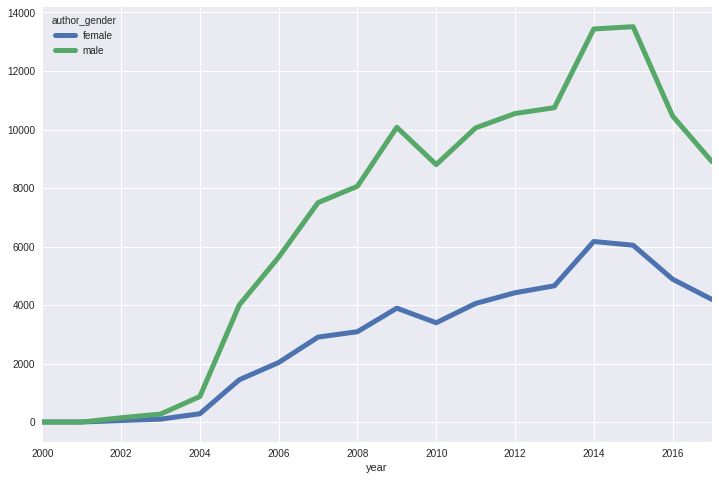

In [124]:
papers_gender_dist.plot(lw=5)
plt.gcf().set_size_inches(12, 8)

## Position in papers of female authors

In [180]:
# filter out male authors
female_authors = papers_authors[papers_authors['author_gender']=='female']
# drop unneccesary columns
female_authors = female_authors.drop(['id', 'title', 'doi', 'year', 'category', 'author_gender'], axis=1)
# group rows authors by author
female_authors_grouped_by_position = female_authors.groupby(['author','author_position'], as_index=False)
# compute frequency of positions
agg_fa_grouped_df = female_authors_grouped_by_position[['author_position']].\
    agg({'author_position': {'count_position': 'count'}})
# pivot table
female_authors_pos = agg_fa_grouped_df.pivot(columns='author_position', values='count_position', index='author')
# fill na values with zero
female_authors_pos = female_authors_pos.fillna(0)
female_authors_pos.head()

/home/jorge/python_venvs/gender_identification/lib/python3.6/site-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


author_position,1,2,3,4,5,6,7,8,9,10,...,92,93,95,103,107,117,118,120,126,129
author,,,,,,,,,,,,,,,,,,,,,
A A Fedorova,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bendoraite,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A K Shchyolkina,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A V Lapuk,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A-Lien Lu,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [204]:
female_authors_pos['freq_pos'] = female_authors_pos.idxmax(axis=1)  #.value_counts()[:10]

In [208]:
female_authors_pos[female_authors_pos['freq_pos']==1].head(10)

author_position,1,2,3,4,5,6,7,8,9,10,...,93,95,103,107,117,118,120,126,129,freq_pos
author,,,,,,,,,,,,,,,,,,,,,
Aafke A van den Berg,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Aafke W F Janssen,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Aakrosh Ratan,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Aamira Tariq,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Aanchal Katoch,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Aarti Garg,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Aarti Sevilimedu,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Abbey B Holt,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Abha Singh Bais,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


### Positions most frequently occuped by female authors in papres

In [288]:
female_authors_pos['freq_pos'].value_counts()[:10]

1     7717
2     6823
3     5665
4     4301
5     3021
6     2184
7     1539
8      998
9      695
10     482
Name: freq_pos, dtype: int64

In [247]:
title_papers_led_female = papers_authors[(papers_authors['author_gender']=='female') & \
                                         (papers_authors['author_position']==1)]['title']
papers_led_female = papers_authors[papers_authors['title'].isin(title_papers_led_female)]
papers_led_female = papers_led_female.drop(['id', 'doi', 'year', 'category', 'author', 'author_position'], axis=1)
papers_led_female_grouped_by_title = papers_led_female.groupby(['title','author_gender'], \
                                                               sort=False, as_index=False)
agg_papers_grouped_lbf = papers_led_female_grouped_by_title[['author_gender']].\
    agg({'author_gender': {'count_gender': 'count'}})
agg_papers_grouped_lbf.head()
papers_led_female_df = agg_papers_grouped_lbf.pivot(columns='author_gender', values='count_gender', index='title') 
papers_led_female_df = papers_led_female_df.drop(['error_api', 'mostly_female', 'mostly_male'], axis=1)
papers_led_female_df = papers_led_female_df.fillna(0)
num_papers_led_by_woman = papers_led_female_df.shape[0]
per_papers_led_by_woman = round(num_papers_led_by_woman/papers.shape[0]*100,2)
print('There are {} ({}%) papers led by a woman'.format(num_papers_led_by_woman, per_papers_led_by_woman))
num_papers_led_by_woman_men = papers_led_female_df[papers_led_female_df['male']>0].shape[0]
per_papers_led_by_woman_men = round(num_papers_led_by_woman_men/num_papers_led_by_woman*100,2)
print('In {} ({}%) of this papers there are also men as co-authors'.format(num_papers_led_by_woman_men, \
                                                                          per_papers_led_by_woman_men))

There are 9594 (25.03%) papers led by a woman
In 8821 (91.94%) of this papers there are also men as co-authors
